In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 19,12

from matplotlib import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as SM

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Problem 1:  Linear Regression

You are hired by a company named Gem Stones Co Ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of approximately 27,000 pieces of cubic zirconia (which is an inexpensive synthesized diamond alternative with similar qualities of a diamond).
Your objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

In [2]:
df1 = pd.read_csv('cubic_zirconia.csv',index_col=0)

In [3]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## 1.1.	Exploratory Data Analysis

In [4]:
df1.duplicated().value_counts()

False    26933
True        34
dtype: int64

#### 34 duplicate rows are present in data, lets drop that duplicate rows

In [5]:
df1.drop_duplicates(inplace=True)

In [6]:
df1.duplicated().value_counts()

False    26933
dtype: int64

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
df1.depth.isnull().value_counts()

False    26236
True       697
Name: depth, dtype: int64

#### there is 697 missing values in depth variable, replacing missing values with mean(61.745)

In [10]:
df1.depth.fillna(df1.depth.mean(),inplace=True)

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.745285,1.393848,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [12]:
lstNumeric = list(df1.select_dtypes(exclude='object').columns)
lstNumeric

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

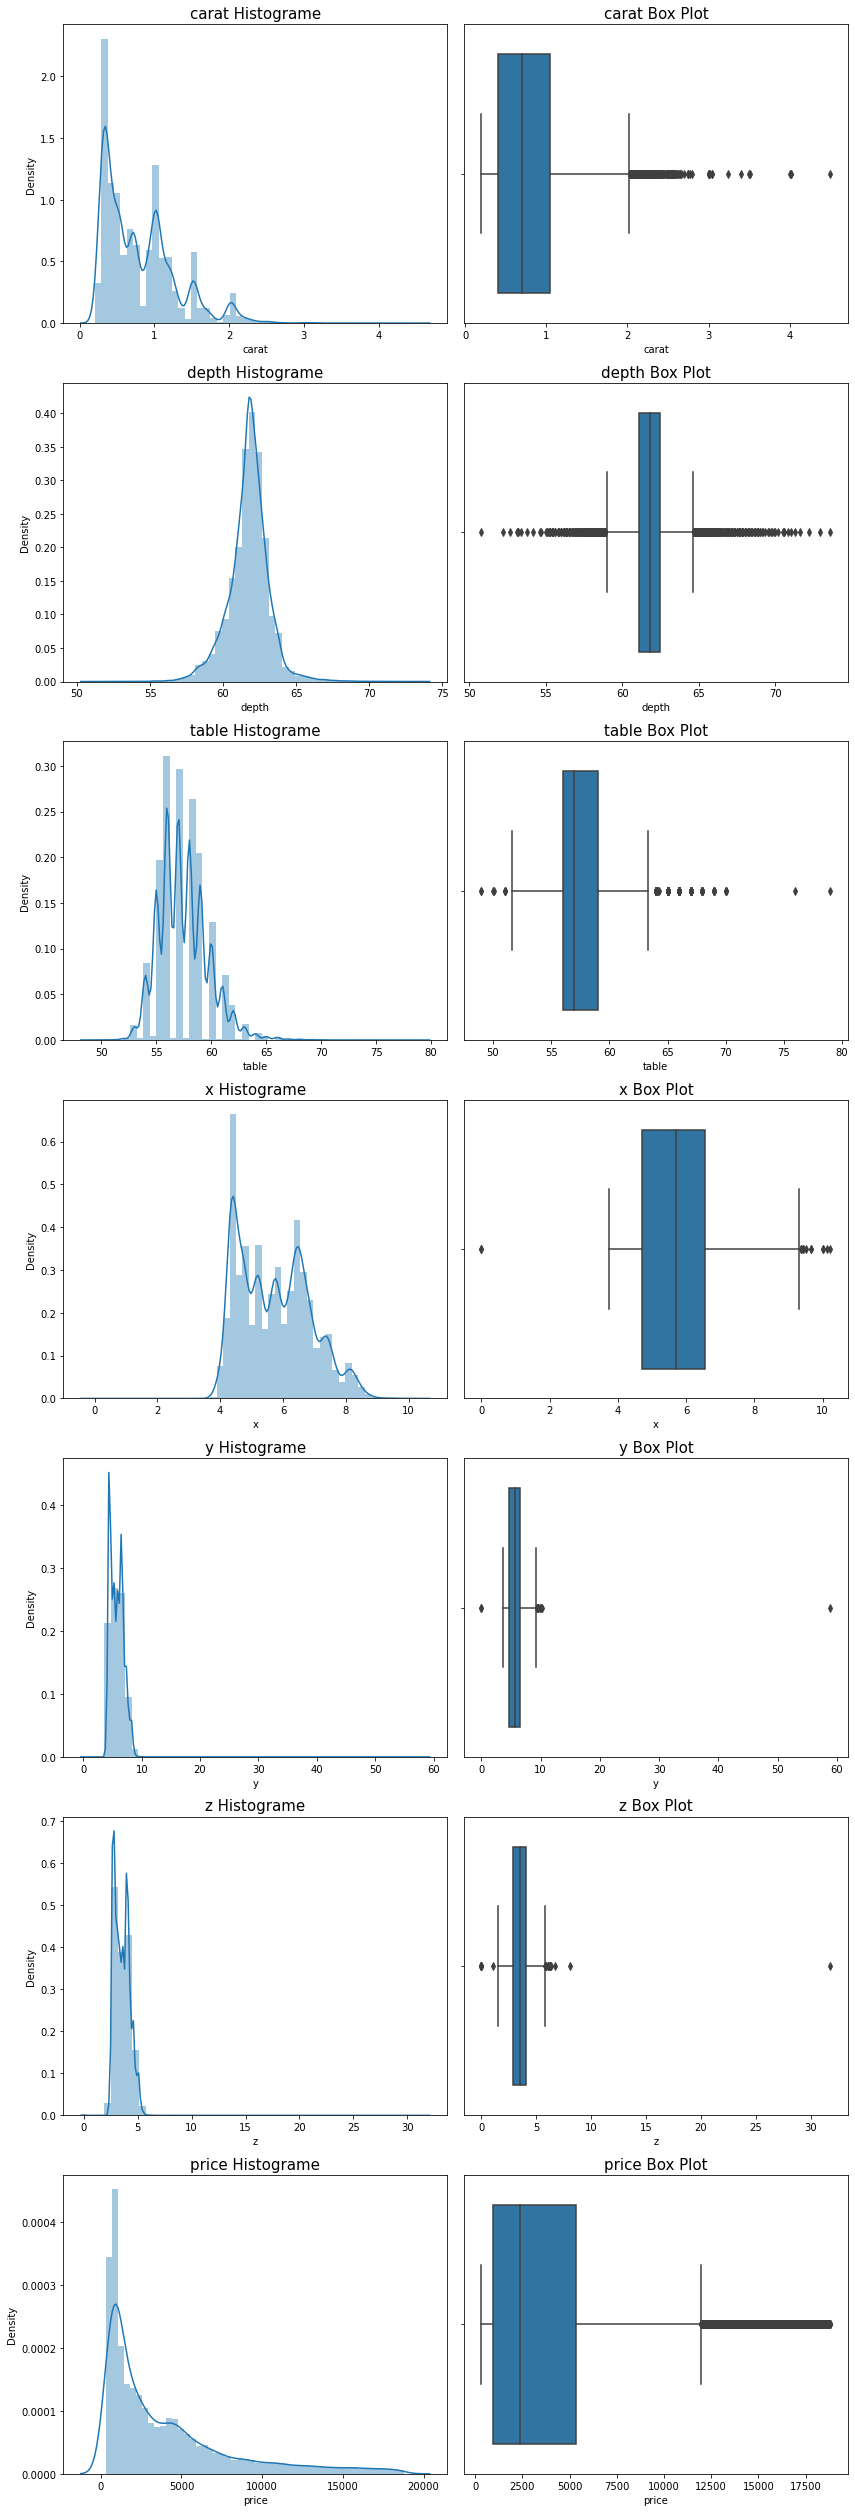

In [13]:
## Univariate continous column
fig, axes = plt.subplots(nrows= len(lstNumeric),ncols=2)
fig.set_size_inches(12, 5*len(lstNumeric))
index = 0;
for i in lstNumeric:
    a = sns.distplot(df1[i], ax=axes[index][0])
    a.set_title(i + ' Histograme',fontsize=15)
    a = sns.boxplot(df1[i] , ax=axes[index][1])
    a.set_title(i + ' Box Plot',fontsize=15)
    index = index+1
plt.tight_layout()
plt.show()

In [14]:
lstctg = list(df1.select_dtypes(exclude=['float64','int64']).columns)
lstctg

['cut', 'color', 'clarity']

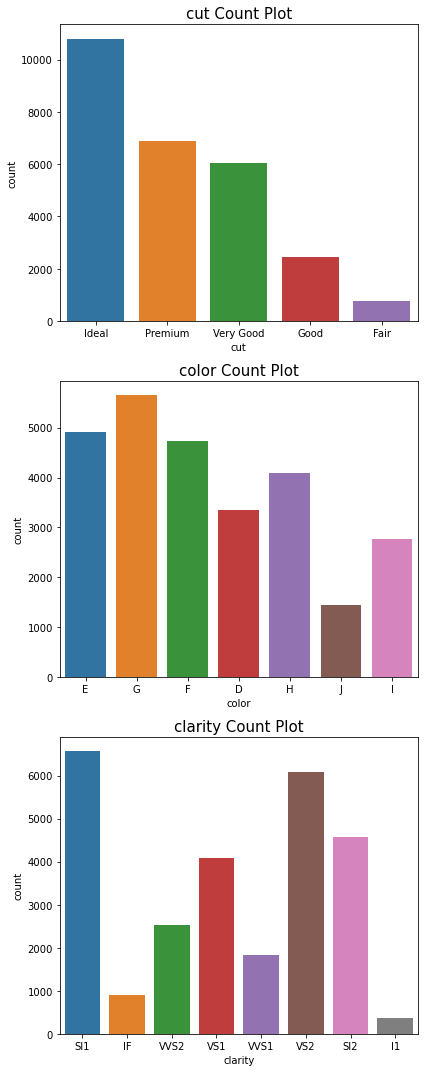

In [15]:
## Univariate catagory column
fig, axes = plt.subplots(nrows= len(lstctg),ncols=1)
fig.set_size_inches(6, 5*len(lstctg))
index = 0;
for i in lstctg:
    a = sns.countplot(df1[i] , ax=axes[index])
    a.set_title(i + ' Count Plot',fontsize=15)
    index = index+1
plt.tight_layout()
plt.show()

In [16]:
df1.cut.value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [17]:
df1.color.value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [18]:
df1.clarity.value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [19]:
## convert catagorical variable into numerical variable by applying lable encoading 

In [20]:
df1.cut.replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5},inplace=True)
df1.color.replace({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I' : 2, 'J' : 1},inplace=True)
df1.clarity.replace({'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2' : 2, 'I1' : 1},inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


In [22]:
df1.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.139845,-0.293894,-0.354829,0.034741,0.181539,0.976858,0.941442,0.940982,0.922409
cut,-0.139845,1.000000,0.026791,0.183258,-0.211965,-0.443218,-0.131904,-0.126487,-0.153063,-0.059768
color,-0.293894,0.026791,1.000000,-0.021329,-0.050130,-0.024124,-0.274069,-0.264245,-0.267291,-0.172883
clarity,-0.354829,0.183258,-0.021329,1.000000,-0.067984,-0.156570,-0.375827,-0.358008,-0.364613,-0.150674
depth,0.034741,-0.211965,-0.050130,-0.067984,1.000000,-0.293720,-0.018145,-0.024139,0.097659,-0.002855
table,0.181539,-0.443218,-0.024124,-0.156570,-0.293720,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.131904,-0.274069,-0.375827,-0.018145,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.126487,-0.264245,-0.358008,-0.024139,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,-0.153063,-0.267291,-0.364613,0.097659,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.059768,-0.172883,-0.150674,-0.002855,0.126844,0.886554,0.856441,0.850682,1.000000


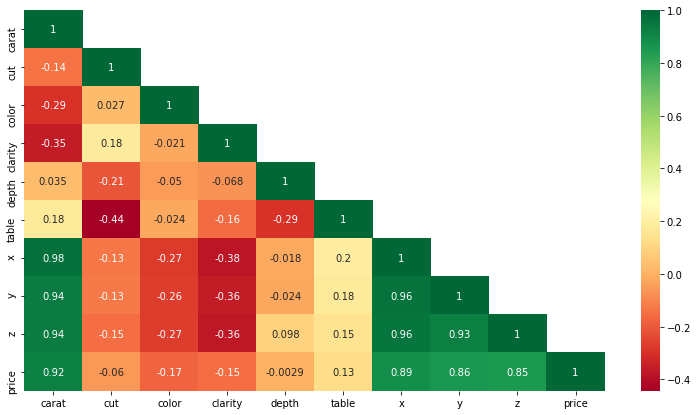

In [23]:
plt.figure(figsize=(13,7))
sns.heatmap(df1.corr(),annot=True,mask=np.triu(df1.corr(),+1),cmap='RdYlGn');

In [24]:
## Lets drop cut and depth independent variable as there is very weak realtion with dependent variable price
#df1.drop(columns=['cut','depth'],inplace=True)

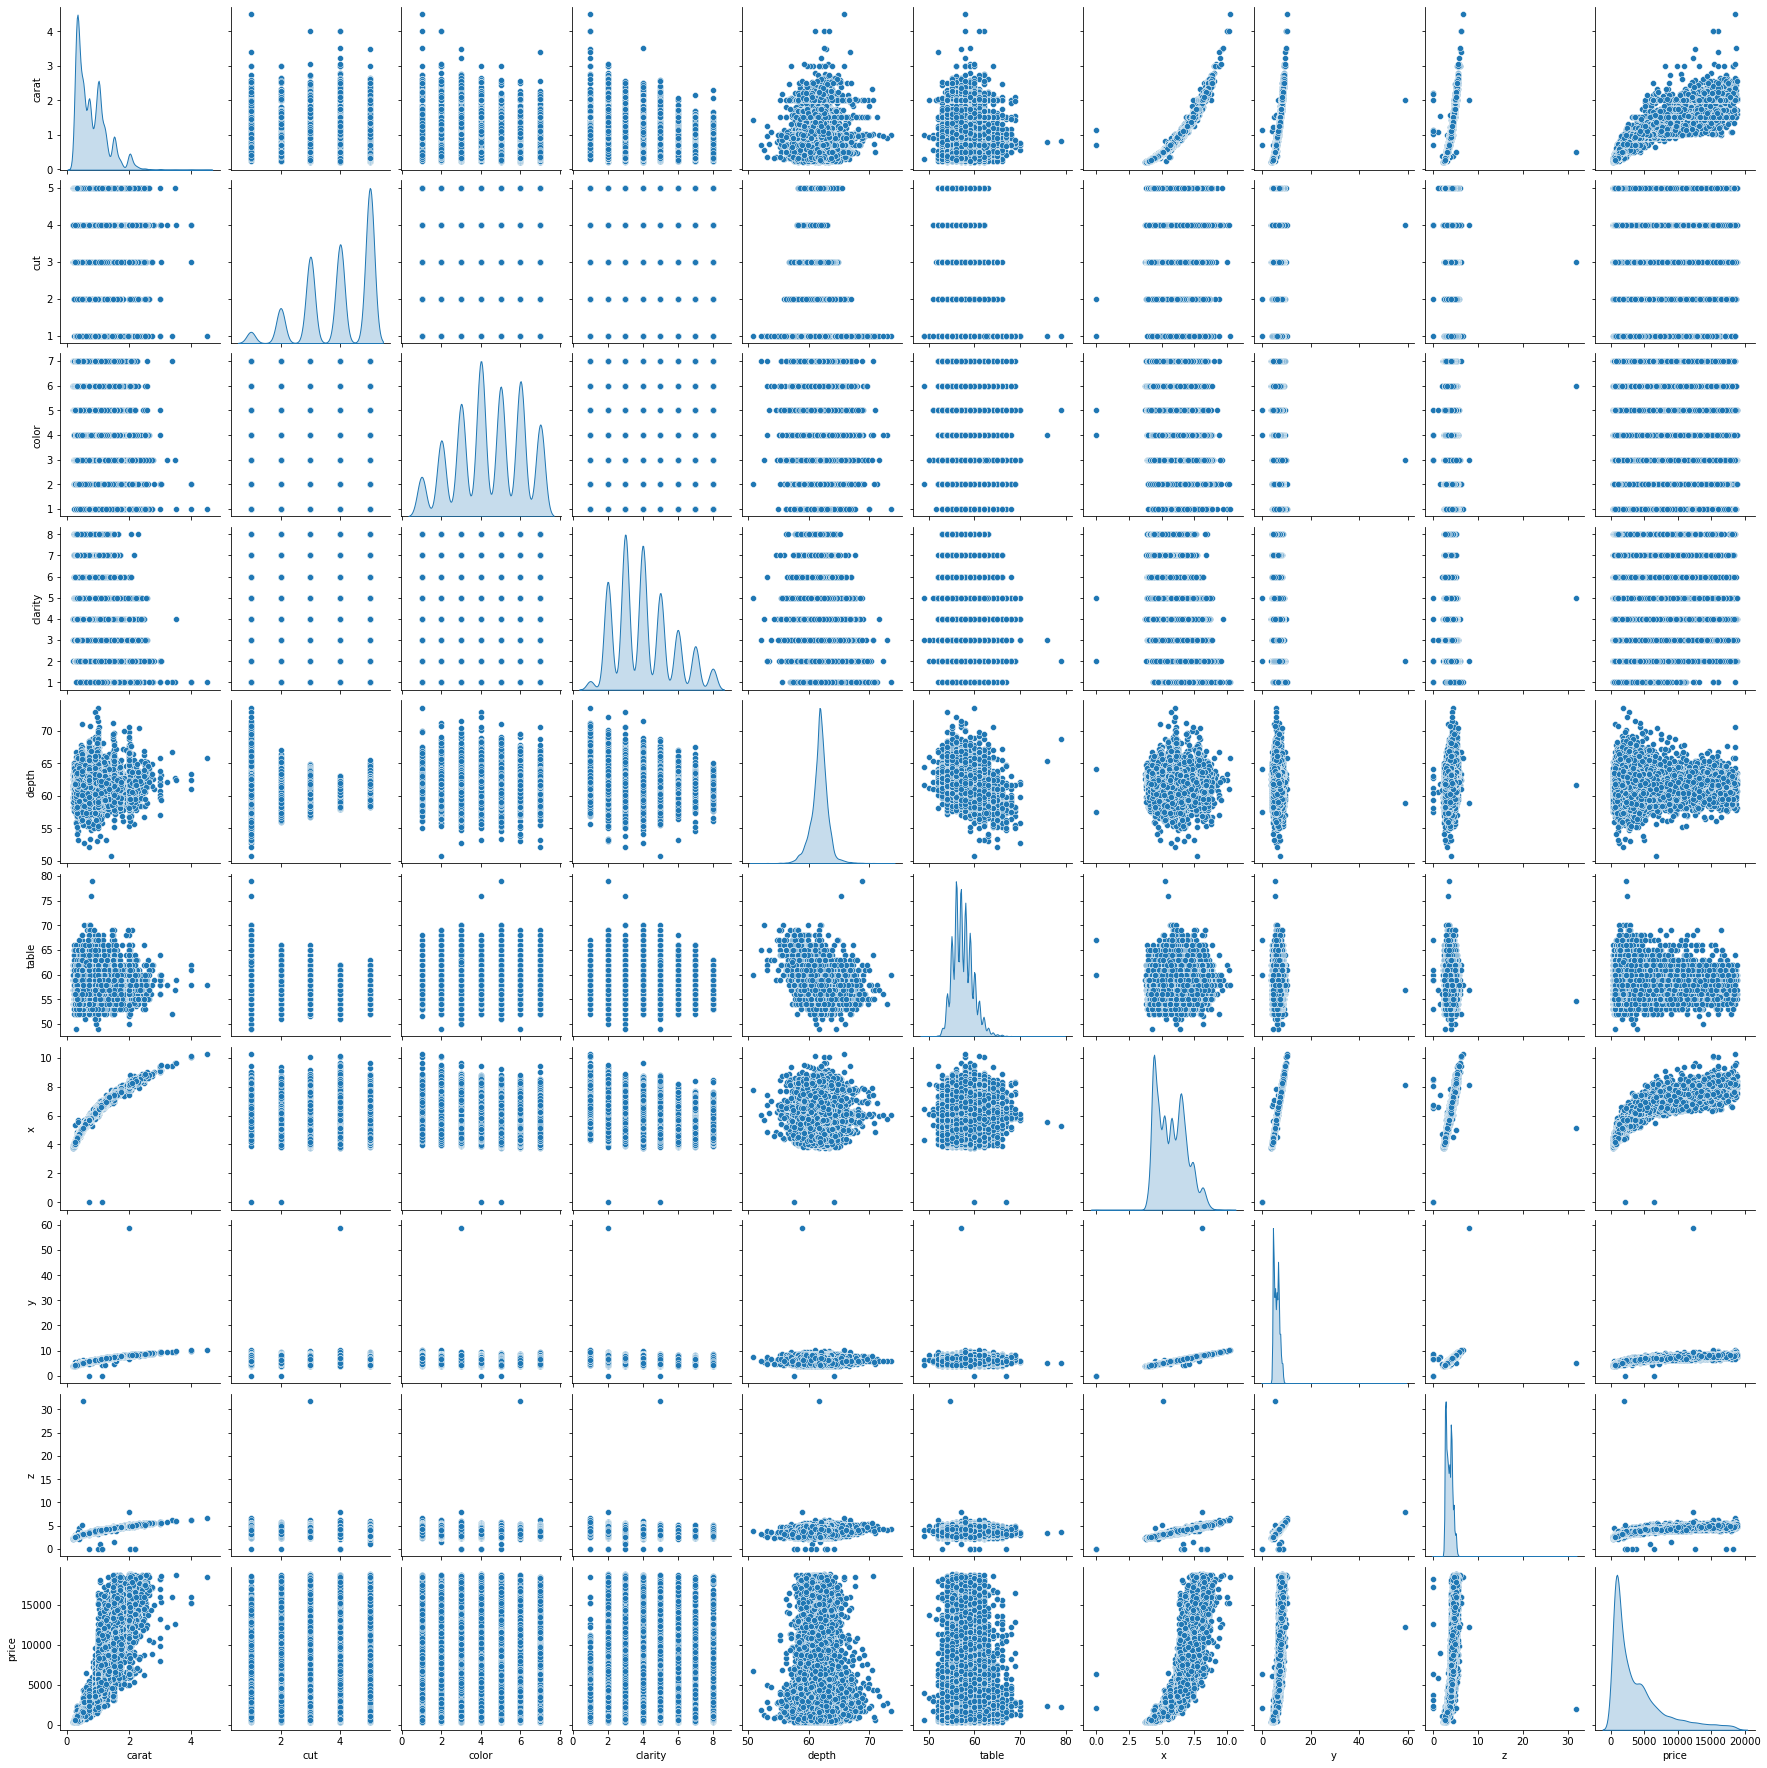

In [25]:
# Pairplot using sns
sns.pairplot(df1 ,diag_kind='kde' );

## 1.2. Build various iterations of the Linear Regression model using appropriate variable selection techniques for the full data.

In [26]:
#check for Multicolinearity 
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [27]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

### Model 1 - Build the Liner Regression Model using all the variables on the full data using statsmodels library

In [28]:
formula_1='price ~ carat+cut+color+depth+clarity+table+x+y+z'

In [29]:
Liner_1 = SM.ols(formula= formula_1, data = df1).fit()

In [30]:
Liner_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.966e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:30   Log-Likelihood:            -2.2957e+05
No. Observations:               26933   AIC:                         4.592e+05
Df Residuals:                   26923   BIC:                         4.592e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3373.8815    607.364      5.555      0.000    2183.417    4564.346
carat       1.091e+04     75.775    143.999      0.000    1.08e+04    1.11e+04
cut          117.5691      8.149     14.428      0.000     101.597     133.541
color        327.9433      4.605     71.209      0.000     318.917     336.970
depth        -82.7053      6.667    -12.406      0.000     -95.772     -69.638
clarity      500.4353      4.996    100.174      0.000     490.644     510.227
table        -30.2031      4.198     -7.194      0.000     -38.432     -21.974
x           -916.2283     44.485    -20.597      0.000   -1003.420    -829.036
y             29.6264     23.718      1.249      0.212     -16.862      76.115
z            -42.9107     38.744     -1.108      0.268    -118.852      33.030
==============================================================================
Omnibus:                     5930.667   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274511.173
Skew:                          -0.101   Prob(JB):                         0.00
Kurtosis:                      18.639   Cond. No.                     6.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF)

In [31]:
vif_cal(input_data=df1.drop('price',axis=1))

carat  VIF =  13.62
cut  VIF =  13.62
color  VIF =  13.62
clarity  VIF =  13.62
depth  VIF =  13.62
table  VIF =  13.62
x  VIF =  13.62
y  VIF =  13.62
z  VIF =  13.62


### Model 2 - Drop the variable which has higest the pvalue (i.e. z) > 0.05 . Build a second iteration of the model on the full data. Check the VIF values of the predictor variables

In [32]:
formula_2 = 'price ~ carat+cut+color+depth+clarity+table+x+y'

In [33]:
Liner_2 = SM.ols(formula= formula_2, data = df1).fit()

In [34]:
Liner_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 3.336e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:30   Log-Likelihood:            -2.2957e+05
No. Observations:               26933   AIC:                         4.592e+05
Df Residuals:                   26924   BIC:                         4.592e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3517.9473    593.273      5.930      0.000    2355.101    4680.794
carat       1.091e+04     75.773    143.994      0.000    1.08e+04    1.11e+04
cut          117.7632      8.147     14.455      0.000     101.795     133.732
color        327.9046      4.605     71.202      0.000     318.878     336.931
depth        -85.1820      6.280    -13.563      0.000     -97.492     -72.872
clarity      500.3665      4.995    100.168      0.000     490.575     510.157
table        -30.0866      4.197     -7.168      0.000     -38.313     -21.860
x           -939.1701     39.368    -23.856      0.000   -1016.333    -862.008
y             26.4919     23.549      1.125      0.261     -19.665      72.649
==============================================================================
Omnibus:                     5931.279   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274645.211
Skew:                          -0.101   Prob(JB):                         0.00
Kurtosis:                      18.643   Cond. No.                     6.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF)

In [35]:
vif_cal(input_data=df1.drop(['price','z'],axis=1))

carat  VIF =  13.62
cut  VIF =  13.62
color  VIF =  13.62
clarity  VIF =  13.62
depth  VIF =  13.62
table  VIF =  13.62
x  VIF =  13.62
y  VIF =  13.62


In [36]:
## Model 3 - Drop the variable which has the higest the pvalue (i.e. y) > 0.05 in the third iteration of the model. Build a forth iteration of the model. Check the VIF values of the predictor variables

In [37]:
formula_3 = 'price ~ carat+cut+color+depth+clarity+table+x'

In [38]:
Liner_3 = SM.ols(formula= formula_3, data = df1).fit()

In [39]:
Liner_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 3.813e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:30   Log-Likelihood:            -2.2957e+05
No. Observations:               26933   AIC:                         4.592e+05
Df Residuals:                   26925   BIC:                         4.592e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3553.6690    592.426      5.999      0.000    2392.483    4714.855
carat       1.091e+04     75.747    144.074      0.000    1.08e+04    1.11e+04
cut          117.5225      8.144     14.430      0.000     101.559     133.486
color        327.9120      4.605     71.204      0.000     318.885     336.939
depth        -85.4990      6.274    -13.627      0.000     -97.797     -73.201
clarity      500.4164      4.995    100.181      0.000     490.626     510.207
table        -30.2846      4.193     -7.222      0.000     -38.504     -22.065
x           -913.6864     32.197    -28.378      0.000    -976.795    -850.578
==============================================================================
Omnibus:                     5934.455   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           275066.329
Skew:                          -0.102   Prob(JB):                         0.00
Kurtosis:                      18.655   Cond. No.                     6.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF)

In [40]:
vif_cal(input_data=df1.drop(['price','z','y'],axis=1))

carat  VIF =  21.86
cut  VIF =  1.02
color  VIF =  1.08
clarity  VIF =  1.16
depth  VIF =  1.0
table  VIF =  1.04
x  VIF =  inf


### Model 4 - Drop the variable which has the highest VIF (x variable) in the third iteration of the model. Build a forth iteration of the model. Check the VIF values of the predictor variables

In [41]:
formula_4 = 'price ~ carat+cut+color+depth+clarity+table'

In [42]:
Liner_4 = SM.ols(formula= formula_4, data = df1).fit()

In [43]:
Liner_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.306e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:30   Log-Likelihood:            -2.2996e+05
No. Observations:               26933   AIC:                         4.599e+05
Df Residuals:                   26926   BIC:                         4.600e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2680.1408    558.350     -4.800      0.000   -3774.535   -1585.747
carat       8823.4707     18.009    489.940      0.000    8788.171    8858.770
cut          120.2370      8.264     14.549      0.000     104.038     136.436
color        323.7082      4.671     69.300      0.000     314.553     332.864
depth        -44.7045      6.198     -7.213      0.000     -56.852     -32.557
clarity      522.7729      5.006    104.435      0.000     512.961     532.584
table        -29.1542      4.255     -6.851      0.000     -37.495     -20.813
==============================================================================
Omnibus:                     5223.591   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98243.939
Skew:                           0.419   Prob(JB):                         0.00
Kurtosis:                      12.319   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF)

In [44]:
vif_cal(input_data=df1.drop(['price','z','y','x'],axis=1))

carat  VIF =  1.3
cut  VIF =  1.49
color  VIF =  1.12
clarity  VIF =  1.2
depth  VIF =  1.32
table  VIF =  1.59


### Hence best model is model 4 in which there is no multi collinearity present in predictors and having adjusted R squared value is 0.906 

## 1.3. Split the data into training (70%) and test (30%). Build the various iterations of the Linear Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics

### Split the data into training (70%) and test (30%)

In [45]:
Train,Test = train_test_split(df1,test_size=0.3,random_state=1)

In [46]:
Train.size

188530

In [47]:
Test.size

80800

In [48]:
Train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [49]:
lr = LinearRegression()

### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data

In [50]:
model_1 = lr.fit(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y', 'z']],Train['price'])

In [51]:
print('Train Accuracy Score of Model 1:',model_1.score(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y', 'z']],Train['price']))
print('Test Accuracy Score of Model 1:',model_1.score(Test[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y', 'z']],Test['price']))

Train Accuracy Score of Model 1: 0.9085604983839957
Test Accuracy Score of Model 1: 0.9078450452130498


In [52]:
model_1_train_class = model_1.predict(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y', 'z']])
model_1_test_class = model_1.predict(Test[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y', 'z']])

In [53]:
model_1_RMSE_Train_base = np.sqrt(mean_squared_error(Train['price'],model_1_train_class))
model_1_RMSE_Test_base = np.sqrt(mean_squared_error(Test['price'],model_1_test_class))

### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data

In [54]:
model_2 = lr.fit(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y']],Train['price'])

In [55]:
print('Train Accuracy Score of Model 2:',model_2.score(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y']],Train['price']))
print('Test Accuracy Score of Model 2:',model_2.score(Test[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y']],Test['price']))

Train Accuracy Score of Model 2: 0.908555196218629
Test Accuracy Score of Model 2: 0.9078435412487519


In [56]:
model_2_train_class = model_2.predict(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y']])
model_2_test_class = model_2.predict(Test[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x', 'y']])

In [57]:
model_2_RMSE_Train_base = np.sqrt(mean_squared_error(Train['price'],model_2_train_class))
model_2_RMSE_Test_base = np.sqrt(mean_squared_error(Test['price'],model_2_test_class))

### Model 3 - Building the model on the Training Data and checking the Accuracy score on the training data

In [58]:
model_3 = lr.fit(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x']],Train['price'])

In [59]:
print('Train Accuracy Score of Model 3:',model_3.score(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x']],Train['price']))
print('Test Accuracy Score of Model 3:',model_3.score(Test[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x']],Test['price']))

Train Accuracy Score of Model 3: 0.9085546719764409
Test Accuracy Score of Model 3: 0.9078376151287759


In [60]:
model_3_train_class = model_3.predict(Train[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x']])
model_3_test_class = model_3.predict(Test[['carat', 'cut', 'color', 'clarity', 'depth','table', 'x']])

In [61]:
model_3_RMSE_Train_base = np.sqrt(mean_squared_error(Train['price'],model_3_train_class))
model_3_RMSE_Test_base = np.sqrt(mean_squared_error(Test['price'],model_3_test_class))

### Model 4 - Building the model on the Training Data and checking the Accuracy score on the training data

In [62]:
model_4 = lr.fit(Train[['carat', 'cut', 'color', 'clarity', 'depth','table']],Train['price'])

In [63]:
print('Train Accuracy Score of Model 4:',model_4.score(Train[['carat', 'cut', 'color', 'clarity', 'depth','table']],Train['price']))
print('Test Accuracy Score of Model 4:',model_4.score(Test[['carat', 'cut', 'color', 'clarity', 'depth','table']],Test['price']))

Train Accuracy Score of Model 4: 0.9056128506663244
Test Accuracy Score of Model 4: 0.9055879513287518


In [64]:
model_4_train_class = model_4.predict(Train[['carat', 'cut', 'color', 'clarity', 'depth','table']])
model_4_test_class = model_4.predict(Test[['carat', 'cut', 'color', 'clarity', 'depth','table']])

In [65]:
model_4_RMSE_Train_base = np.sqrt(mean_squared_error(Train['price'],model_4_train_class))
model_4_RMSE_Test_base = np.sqrt(mean_squared_error(Test['price'],model_4_test_class))

### RMSE score of train and test data for model 1,2,3 and 4

In [66]:
resultDf_trn = pd.DataFrame({'RMSE Training Data':[model_1_RMSE_Train_base,model_2_RMSE_Train_base,model_3_RMSE_Train_base,model_4_RMSE_Train_base],
                             'RMSE Test Data':[model_1_RMSE_Test_base,model_2_RMSE_Test_base,model_3_RMSE_Test_base,model_4_RMSE_Test_base]},
                            index=[['Model 1','Model 2','Model 3','Model 4']])
resultDf_trn

,RMSE Training Data,RMSE Test Data
Model 1,1212.418475,1230.273848
Model 2,1212.453626,1230.283887
Model 3,1212.457101,1230.323443
Model 4,1231.805263,1245.248874


## Conclusion: the final model of Part (II) and the proposed one in Part (III) are different. After calculating the accuracy and RMSE score of model 4 in Part (III), we can see that the accuracy is dropping in model 4 as compared to model 3. So we should go with model 3 as compared to model 4 having predictor carat, cut, color, clarity, depth, table and x.  

# Problem 2:  Logistic Regression

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [67]:
df2 = pd.read_csv('Holiday_Package.csv',index_col=0)

In [68]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no


In [69]:
df2.shape

(872, 7)

## 2.1. Exploratory Data Analysis for Problem 2

In [70]:
df2.duplicated().value_counts()

False    872
dtype: int64

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [72]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


### Univariate Analysis

In [73]:
lstNumeric = list(df2.select_dtypes(exclude='object').columns)
lstNumeric

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

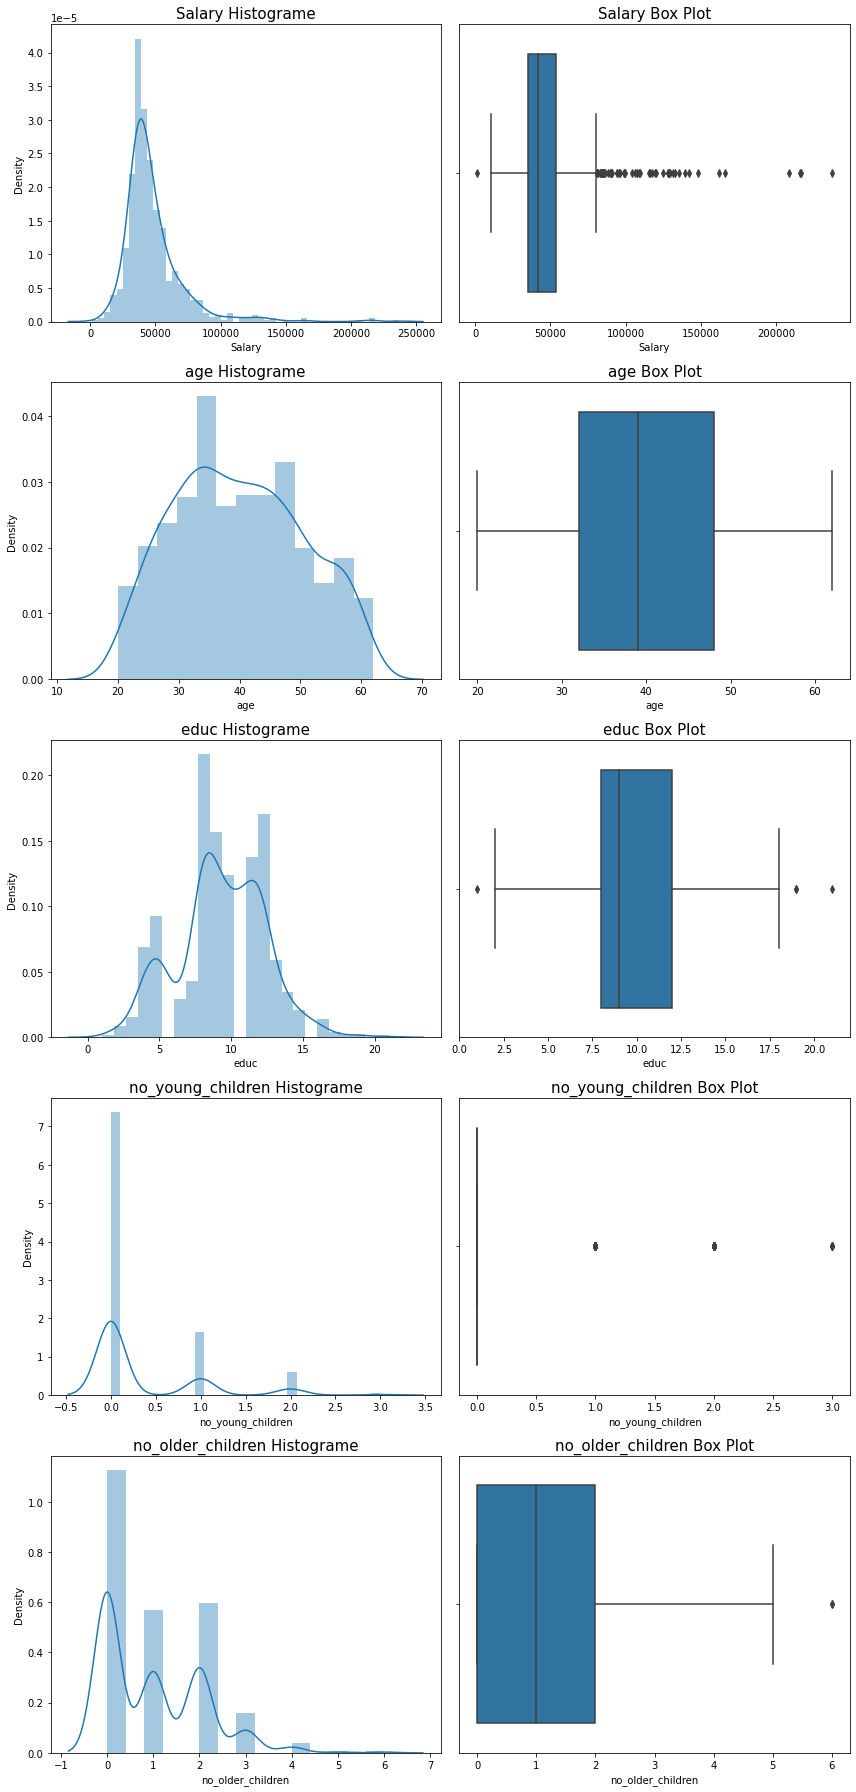

In [74]:
## Univariate continous column
fig, axes = plt.subplots(nrows= len(lstNumeric),ncols=2)
fig.set_size_inches(12, 5*len(lstNumeric))
index = 0;
for i in lstNumeric:
    a = sns.distplot(df2[i] , ax=axes[index][0])
    a.set_title(i + ' Histograme',fontsize=15)
    a = sns.boxplot(df2[i] , ax=axes[index][1])
    a.set_title(i + ' Box Plot',fontsize=15)
    index = index+1
plt.tight_layout()
plt.show()

In [75]:
df2.drop('no_young_children',axis=1,inplace=True)
df2.head()

,Holliday_Package,Salary,age,educ,no_older_children,foreign
1,no,48412,30,8,1,no
2,yes,37207,45,8,1,no
3,no,58022,46,9,0,no
4,no,66503,31,11,0,no
5,no,66734,44,12,2,no


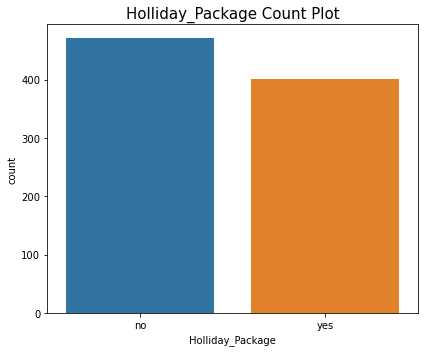

In [76]:
plt.figure(figsize=(6, 5))
a = sns.countplot(df2['Holliday_Package'])
a.set_title('Holliday_Package' + ' Count Plot',fontsize=15)
plt.tight_layout()
plt.show()

In [77]:
df2['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

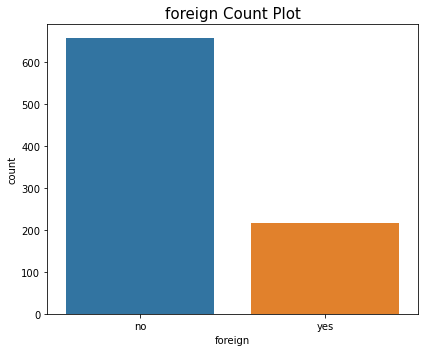

In [78]:
plt.figure(figsize=(6, 5))
a = sns.countplot(df2['foreign'])
a.set_title('foreign' + ' Count Plot',fontsize=15)
plt.tight_layout()
plt.show()

In [79]:
df2['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

### Lets apply label encoding method called ‘One-Hot encoding’ on Holliday_Package predictor and drop Holliday_Package_no column

In [80]:
df2_dummy = pd.get_dummies(df2.drop('foreign',axis=1),drop_first=True)
df2_dummy.head()

,Salary,age,educ,no_older_children,Holliday_Package_yes
1,48412,30,8,1,0
2,37207,45,8,1,1
3,58022,46,9,0,0
4,66503,31,11,0,0
5,66734,44,12,2,0


In [81]:
df2_dummy = pd.concat([df2_dummy,df2['foreign']],axis=1)
df2_dummy.head()

,Salary,age,educ,no_older_children,Holliday_Package_yes,foreign
1,48412,30,8,1,0,no
2,37207,45,8,1,1,no
3,58022,46,9,0,0,no
4,66503,31,11,0,0,no
5,66734,44,12,2,0,no


### Multivariate analysis:
Heat map


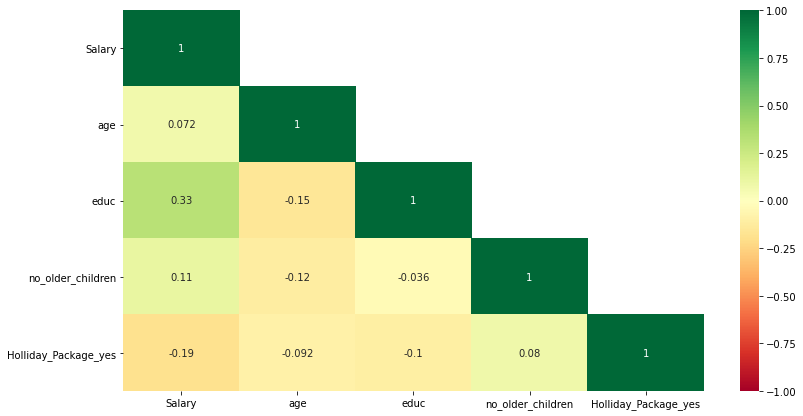

In [82]:
plt.figure(figsize=(13,7))
sns.heatmap(df2_dummy.corr(),annot=True,vmin=-1,vmax=1,mask=np.triu(df2_dummy.corr(),+1),cmap='RdYlGn');

### Plot a series of scatterplots between the continuous independent variables keeping the target variable as a hue

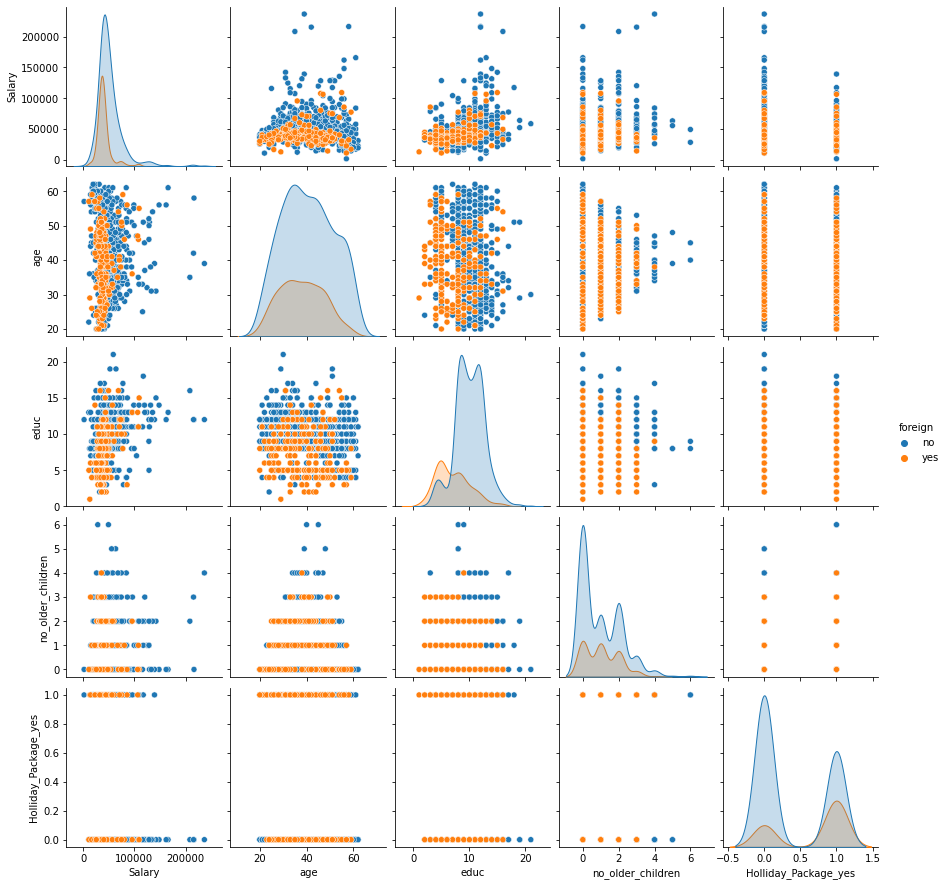

In [83]:
sns.pairplot(df2_dummy ,diag_kind='kde' ,hue='foreign');

### Converting the 'foreign' Variable into numeric by replacing no as 0 and yes as 1.


In [84]:
df2_dummy['foreign'].replace({'no': 0, 'yes': 1},inplace=True)
df2_dummy.head()

,Salary,age,educ,no_older_children,Holliday_Package_yes,foreign
1,48412,30,8,1,0,0
2,37207,45,8,1,1,0
3,58022,46,9,0,0,0
4,66503,31,11,0,0,0
5,66734,44,12,2,0,0


## 2.2. Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare, as many criteria as you feel are suitable

### Model 1 - Build the Logistic Regression Model using all the variables on the full data using statsmodels library

In [85]:
df2_dummy.columns

Index(['Salary', 'age', 'educ', 'no_older_children', 'Holliday_Package_yes',
       'foreign'],
      dtype='object')

In [86]:
formula_1='foreign ~ Salary+age+educ+no_older_children+Holliday_Package_yes'

In [87]:
Logistic_1 = SM.logit(formula=formula_1,data=df2_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.421581
         Iterations 7


In [88]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                foreign   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 May 2022   Pseudo R-squ.:                  0.2469
Time:                        19:12:38   Log-Likelihood:                -367.62
converged:                       True   LL-Null:                       -488.15
Covariance Type:            nonrobust   LLR p-value:                 4.558e-50
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0980      0.591      6.931      0.000       2.939       5.257
Salary               -1.162e-05   6.75e-06     -1.722      0.085   -2.49e-05    1.61e-06
age                     -0.0464      0.009     -4.899      0.000      -0.065      -0.028
educ                    -0.3966      0.038    -10.379      0.000      -0.472      -0.322
no_older_children       -0.0502      0.087     -0.578      0.563      -0.221       0.120
Holliday_Package_yes     1.0770      0.190      5.674      0.000       0.705       1.449
========================================================================================
"""

### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [89]:
vif_cal(input_data=df2_dummy.drop('foreign',axis=1))

Salary  VIF =  1.2
age  VIF =  1.07
educ  VIF =  1.17
no_older_children  VIF =  1.05
Holliday_Package_yes  VIF =  1.05


### Model 2 - Drop the variable which has the highest VIF value. Build a second iteration of the model on the full data
## Note : Threshold value considered is VIF < 1.15

In [90]:
formula_2 = 'foreign ~ age+educ+no_older_children+Holliday_Package_yes'

In [91]:
Logistic_2 = SM.logit(formula=formula_2,data=df2_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.423425
         Iterations 7


In [92]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                foreign   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Tue, 17 May 2022   Pseudo R-squ.:                  0.2436
Time:                        19:12:38   Log-Likelihood:                -369.23
converged:                       True   LL-Null:                       -488.15
Covariance Type:            nonrobust   LLR p-value:                 2.707e-50
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.8450      0.569      6.760      0.000       2.730       4.960
age                     -0.0485      0.009     -5.115      0.000      -0.067      -0.030
educ                    -0.4167      0.037    -11.328      0.000      -0.489      -0.345
no_older_children       -0.0727      0.086     -0.845      0.398      -0.241       0.096
Holliday_Package_yes     1.1282      0.188      6.003      0.000       0.760       1.497
========================================================================================
"""

In [93]:
vif_cal(input_data=df2_dummy.drop(['foreign','Salary'],axis=1))

age  VIF =  1.05
educ  VIF =  1.04
no_older_children  VIF =  1.02
Holliday_Package_yes  VIF =  1.03


### Model 3 - Drop the variable which has the highest p-value>0.05 (no_older_children variable) in the second iteration of the model. Build a third iteration of the model

In [94]:
formula_3='foreign ~ age+educ+Holliday_Package_yes'

In [95]:
Logistic_3 = SM.logit(formula=formula_3,data=df2_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.423840
         Iterations 7


In [96]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                foreign   No. Observations:                  872
Model:                          Logit   Df Residuals:                      868
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 May 2022   Pseudo R-squ.:                  0.2429
Time:                        19:12:38   Log-Likelihood:                -369.59
converged:                       True   LL-Null:                       -488.15
Covariance Type:            nonrobust   LLR p-value:                 3.998e-51
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7486      0.558      6.722      0.000       2.656       4.842
age                     -0.0480      0.010     -5.041      0.000      -0.067      -0.029
educ                    -0.4155      0.037    -11.304      0.000      -0.488      -0.343
Holliday_Package_yes     1.1146      0.187      5.961      0.000       0.748       1.481
========================================================================================
"""

In [97]:
vif_cal(input_data=df2_dummy.drop(['foreign','Salary','no_older_children'],axis=1))

age  VIF =  1.04
educ  VIF =  1.04
Holliday_Package_yes  VIF =  1.02


### model 3 is best model as pvalue is < 0.05 for remaining predictors and VIF is also < 1.15. So there is no multi co-linearity present in model

## 2.3.	Split the data into training (70%) and test (30%). Build the various iterations of the Logistic Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.

In [98]:
Train,Test = train_test_split(df2_dummy,test_size=0.3,random_state=1,stratify=df2_dummy['foreign'])

In [99]:
Train.shape

(610, 6)

In [100]:
Test.shape

(262, 6)

In [101]:
Train['foreign'].value_counts(1)

0    0.752459
1    0.247541
Name: foreign, dtype: float64

In [102]:
Test['foreign'].value_counts(1)

0    0.751908
1    0.248092
Name: foreign, dtype: float64

In [103]:
LR = LogisticRegression(random_state=1)

### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [104]:
model_1 = LR.fit(Train[['Salary', 'age', 'educ', 'no_older_children', 'Holliday_Package_yes']],Train['foreign'])

In [105]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Salary', 'age', 'educ', 'no_older_children', 'Holliday_Package_yes']],Train['foreign']))

Accuracy Score of Model 1: 0.7524590163934426


### Model 1 - Predicting the classes and the probabilities on the Test Data

In [106]:
model_1_test_class = model_1.predict(Test[['Salary', 'age', 'educ', 'no_older_children', 'Holliday_Package_yes']])
model_1_test_probabilities = model_1.predict_proba(Test[['Salary', 'age', 'educ', 'no_older_children', 'Holliday_Package_yes']])

### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [107]:
model_2 = LR.fit(Train[['age', 'educ', 'no_older_children', 'Holliday_Package_yes']],Train['foreign'])

In [108]:
print('Accuracy Score of Model 2:',model_2.score(Train[['age', 'educ', 'no_older_children', 'Holliday_Package_yes']],Train['foreign']))

Accuracy Score of Model 2: 0.8311475409836065


### Model 2 - Predicting the classes and the probabilities on the Test Data

In [109]:
model_2_test_class = model_2.predict(Test[['age', 'educ', 'no_older_children', 'Holliday_Package_yes']])
model_2_test_probabilities = model_2.predict_proba(Test[['age', 'educ', 'no_older_children', 'Holliday_Package_yes']])

### Model 3 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [110]:
model_3 = LR.fit(Train[['age', 'educ', 'Holliday_Package_yes']],Train['foreign'])

In [111]:
print('Accuracy Score of Model 3:',model_3.score(Train[['age', 'educ', 'Holliday_Package_yes']],Train['foreign']))

Accuracy Score of Model 3: 0.8377049180327869


### Model 3 - Predicting the classes and the probabilities on the Test Data

In [112]:
model_3_test_class = model_3.predict(Test[['age', 'educ', 'Holliday_Package_yes']])
model_3_test_probabilities = model_3.predict_proba(Test[['age', 'educ', 'Holliday_Package_yes']])

#### Confusion Matrix summary statistics Evaluation on the Test Data

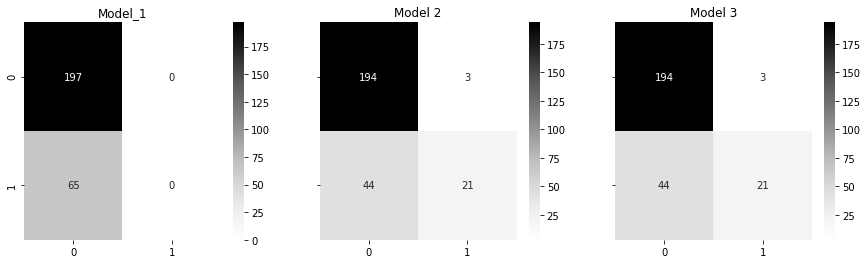

In [113]:
rcParams['figure.figsize'] = 15,4

f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['foreign'],model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['foreign'],model_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['foreign'],model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 3');

In [114]:
print('Model 1')
print(metrics.classification_report(Test['foreign'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['foreign'],model_2_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['foreign'],model_3_test_class))

Model 1
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       197
           1       0.00      0.00      0.00        65

    accuracy                           0.75       262
   macro avg       0.38      0.50      0.43       262
weighted avg       0.57      0.75      0.65       262
 

Model 2
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       197
           1       0.88      0.32      0.47        65

    accuracy                           0.82       262
   macro avg       0.85      0.65      0.68       262
weighted avg       0.83      0.82      0.79       262
 

Model 3
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       197
           1       0.88      0.32      0.47        65

    accuracy                           0.82       262
   macro avg       0.85      0.65      0.68       262
weighted avg       0.83      0.82      0.79   

Model 1 AUC: 0.67911


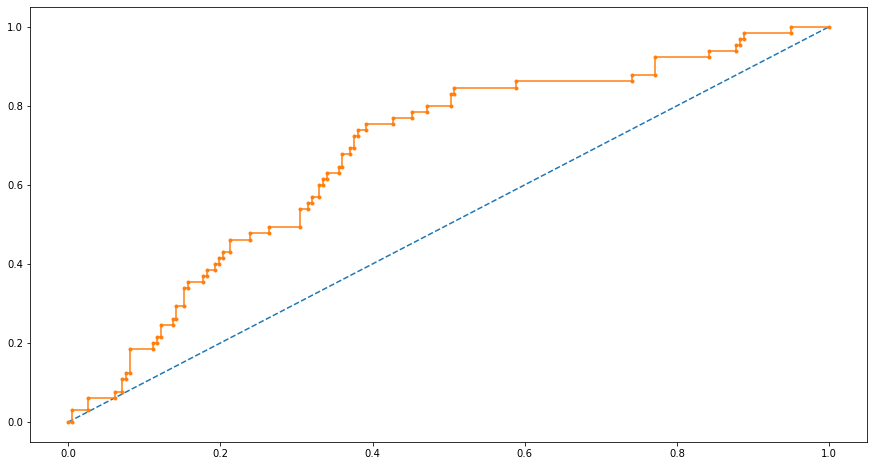

Model 2 AUC: 0.81281


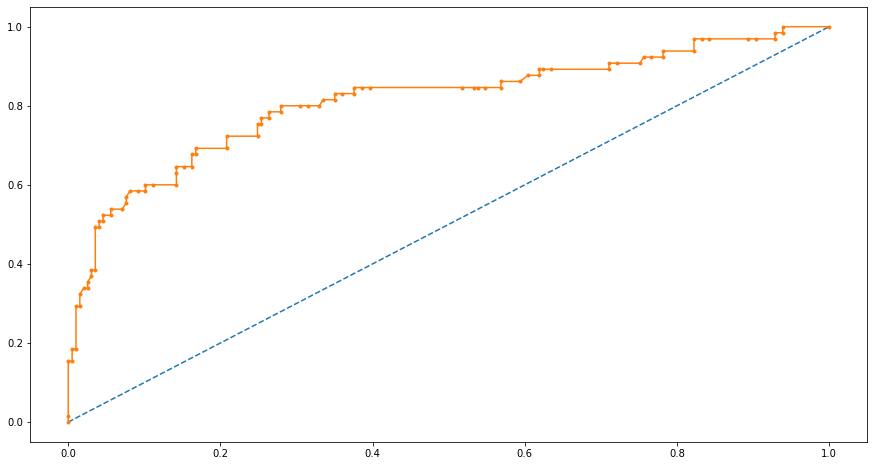

Model 3 AUC: 0.81000


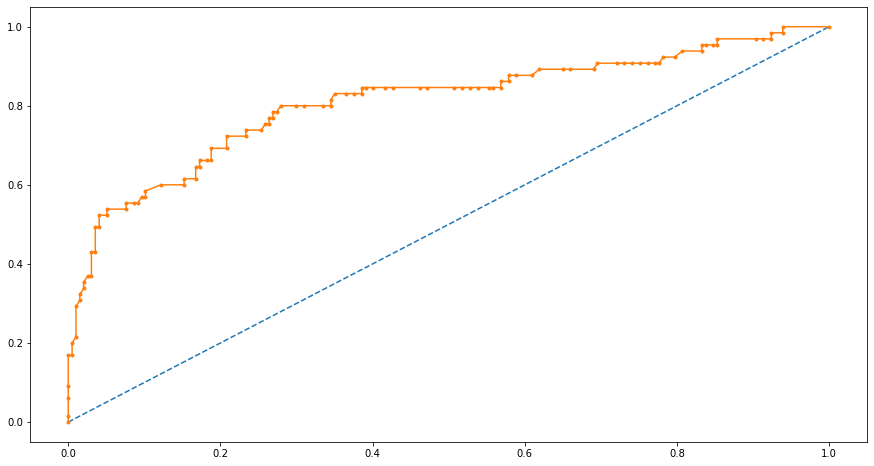

In [115]:
rcParams['figure.figsize'] = 15,8
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['foreign'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['foreign'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['foreign'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['foreign'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['foreign'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['foreign'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Conclusion: the final model of Part (II) and the proposed one in Part (III) are different. After calculating the accuracy and confusion matrix summary, classification report, AUC and ROC curve of model 3 in Part (III), we can see that the accuracy is dropping in model 3 as compared to model 2. So we should go with model 2 as compared to model 3 having predictor age, educ, no_older_children, Holliday_Package_yes.